In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import time
from matplotlib import colors

if 'path' in locals(): os.chdir(path)
else: os.chdir("../"); path = os.getcwd()
print("The path is:", path)
path_manustript = path + "/Manuscript_Results/"
path_figure4 = path_manustript + "Figure4/"
from pyMFI import MFI
from pyMFI import MFI1D
# from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

The path is: /home/ucecabj/Desktop/pyMFI_git


In [2]:
def remove_flat_tail(x, FES, sd):
    
    while FES[-1] - FES[-3] < 10E-10:
        FES = FES[:-2]
        x = x[:-2]
        sd = sd[:-2]
        
    return [x, FES, sd]


#### Load bias force

In [3]:
from scipy import interpolate
import glob
grid_list = [np.linspace(0, 275, 2201), np.linspace(0, 310, 2481), np.linspace(0, 315, 2521), np.linspace(0, 330, 2641)]


for file in glob.glob("/home/ucecabj/Storage/MFI_new/LJ_fluid/T6n55_dataset/forward/negativebias.dat"):
    data = np.loadtxt(file)
    data_x = data[:,0]
    data_z = data[:,2]

data_x = np.pad(data_x, (0,330), 'reflect', reflect_type='odd')
data_z = np.pad(data_z, (0,330),  'constant', constant_values=(0,0))

f = interpolate.interp1d(data_x, -data_z)

bias_force_65 = f(grid_list[1])
bias_force_73 = f(grid_list[2])
bias_force_80 = f(grid_list[3])

#### Load T6n55 dataset forces

In [4]:
path_master = "/home/ucecabj/Storage/MFI_new/LJ_fluid/LJ_results/results_T6n55/"

#initialise force list and grid
forceterms_forw = []; forceterms_back = []

index_list = np.arange(1,51).tolist()
index_list.remove(9)

#load force terms
for i in index_list:
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "forward_master_" + str(i) + "_n55")
    forceterms_forw.append( [Ftot_den, Ftot_den2, Ftot, ofv_num] )
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "backward_master_" + str(i) + "_n55")
    forceterms_back.append( [Ftot_den, Ftot_den2, Ftot, ofv_num] )

MFI.save_npy([forceterms_forw, forceterms_back], path_figure4 + "LJ_n55_allforces")

#### Load T6n65 dataset forces

In [5]:
path_master = "/home/ucecabj/Storage/MFI_new/LJ_fluid/LJ_results/results_T6n65/"

#initialise force list and grid
forceterms_forw = []; forceterms_back = []

index_list = np.arange(1,51).tolist()
index_list.remove(19)
index_list.remove(20)
index_list.remove(28)
index_list.remove(49)

#load force terms
for i in index_list:
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "forward_master_" + str(i) + "_n65")
    forceterms_forw.append( [Ftot_den, Ftot_den2, Ftot + bias_force_65, ofv_num] )
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "backward_master_" + str(i) + "_n65")
    forceterms_back.append( [Ftot_den, Ftot_den2, Ftot, ofv_num] )

MFI.save_npy([forceterms_forw, forceterms_back], path_figure4 + "LJ_n65_allforces")

#### Load T6n73 dataset forces

In [6]:
path_master = "/home/ucecabj/Storage/MFI_new/LJ_fluid/LJ_results/results_T6n73/"

#initialise force list and grid
forceterms_forw = []; forceterms_back = []

index_list = np.arange(1,51).tolist()
index_list.remove(2)
index_list.remove(21)

#load force terms
for i in index_list:
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "forward_master_" + str(i) + "_n73")
    forceterms_forw.append( [Ftot_den, Ftot_den2, Ftot + bias_force_73, ofv_num] )
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "backward_master_" + str(i) + "_n73")
    forceterms_back.append( [Ftot_den, Ftot_den2, Ftot, ofv_num] )

MFI.save_npy([forceterms_forw, forceterms_back], path_figure4 + "LJ_n73_allforces")

#### Load T6n80 dataset forces

In [7]:
path_master = "/home/ucecabj/Storage/MFI_new/LJ_fluid/LJ_results/results_T6n80/"

#initialise force list and grid
forceterms_forw = []; forceterms_back = []

index_list = np.arange(1,51).tolist()
# index_list.remove(3) 
# index_list.remove(5)
# index_list.remove(7)
index_list.remove(38)

#load force terms
for i in index_list:
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "forward_master_" + str(i) + "_n80")
    forceterms_forw.append( [Ftot_den, Ftot_den2, Ftot + bias_force_80, ofv_num] )
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "backward_master_" + str(i) + "_n80")
    forceterms_back.append( [Ftot_den, Ftot_den2, Ftot, ofv_num] )

MFI.save_npy([forceterms_forw, forceterms_back], path_figure4 + "LJ_n80_allforces")

#### Bootstrap and Plot

Itteration: 50 - sd: 0.61907
Itteration: 100 - sd: 0.658
(98, 4, 2201)
1.8757717177093691
Itteration: 50 - sd: 0.45797
Itteration: 100 - sd: 0.48283
(92, 4, 2481)
28.567906142849065
Itteration: 50 - sd: 0.4504
Itteration: 100 - sd: 0.45378
(96, 4, 2521)
2.366091404624422
Itteration: 50 - sd: 0.57468
Itteration: 100 - sd: 0.55404
(98, 4, 2641)
2.4105251169486377


(1, 300)

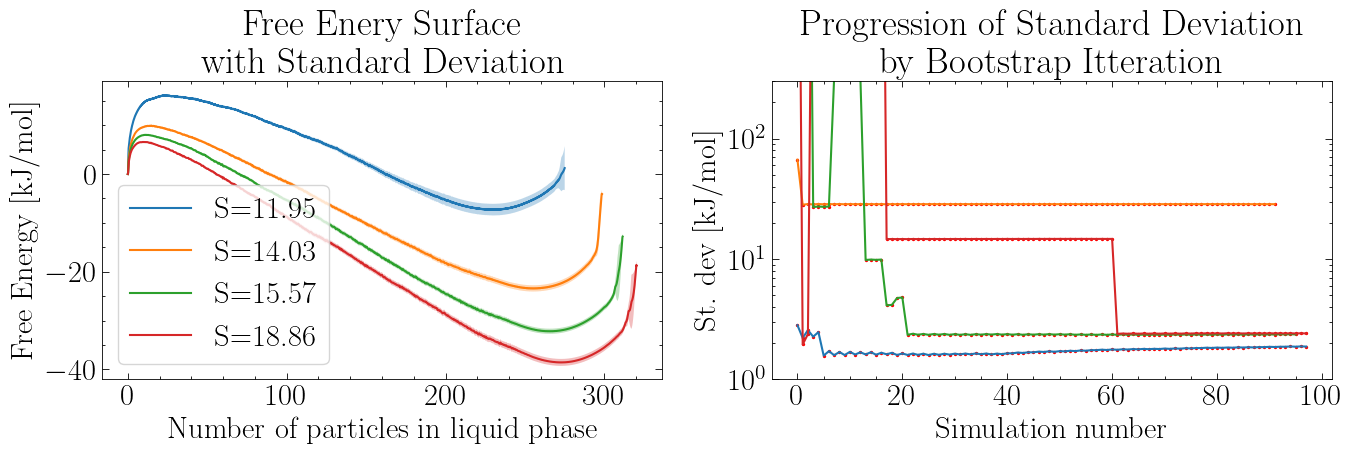

In [8]:
name_list = ["55", "65", "73", "80"]
label_list = ["11.95", "14.03", "15.57", "18.86"]
grid_list = [np.linspace(0, 275, 2201), np.linspace(0, 310, 2481), np.linspace(0, 315, 2521), np.linspace(0, 330, 2641)]
FES_sd_list = []
plt.figure(figsize=(14,5)); 

for i in [0,1,2,3]:

    #load forward and backward forces
    [forceterms_forw, forceterms_back] = MFI.load_npy(path_figure4 + "LJ_n" + name_list[i] + "_allforces")

    #Boostrap
    [FES_avr, sd_fes, sd_fes_prog ] = MFI1D.bootstrap_forw_back(grid_list[i], np.asarray(forceterms_forw[:,[0,2],:]), np.asarray(forceterms_back[:,[0,2],:]), n_bootstrap=100, set_fes_minima="first_value")
    # FES_sd_list.append([FES_avr, sd_fes, sd_fes_prog ])
    [x_plot, FES_plot, sd_plot] = remove_flat_tail(grid_list[i], FES_avr, sd_fes)
    
    #calculate ofe error progression of patching
    # all_forces = np.empty((int(len(forceterms_forw)*2), 4, len(grid_list[i])))
    # all_forces[0::2] = forceterms_forw
    # all_forces[1::2] = forceterms_back
    
    all_forces = []
    # for j in range(38):
    for j in range(len(forceterms_forw)): 
        
        if j==100 or j==200 :
            print(j)
            
        else:
            all_forces.append(forceterms_back[j])
            all_forces.append(forceterms_forw[j])
        
    print(np.shape(all_forces))
    
    
    Ftot_den, Ftot_den2, Ftot, ofv_num, ofe, Aofe = MFI1D.patch_forces_ofe(np.asarray(all_forces), ofe_progression=True, use_weighted_st_dev=True)
    
    print(Aofe[-1])

    plt.subplot(1,2,1)
    plt.plot(x_plot, FES_plot, label="S=" + label_list[i])
    plt.fill_between(x_plot, FES_plot - sd_plot, FES_plot + sd_plot, alpha=0.3)

    plt.subplot(1,2,2)
    plt.plot(range(len(Aofe)), Aofe)
    plt.scatter(range(len(Aofe)), Aofe, s=2, c="r")


plt.subplot(1,2,1); plt.xlabel("Number of particles in liquid phase"), plt.ylabel("Free Energy [kJ/mol]"); plt.legend(); plt.title("Free Enery Surface \nwith Standard Deviation")

plt.subplot(1,2,2); plt.xlabel("Simulation number"), plt.ylabel("St. dev [kJ/mol]"); plt.title("Progression of Standard Deviation\nby Bootstrap Itteration"); plt.tight_layout(); plt.yscale("log"); plt.ylim(1,300)

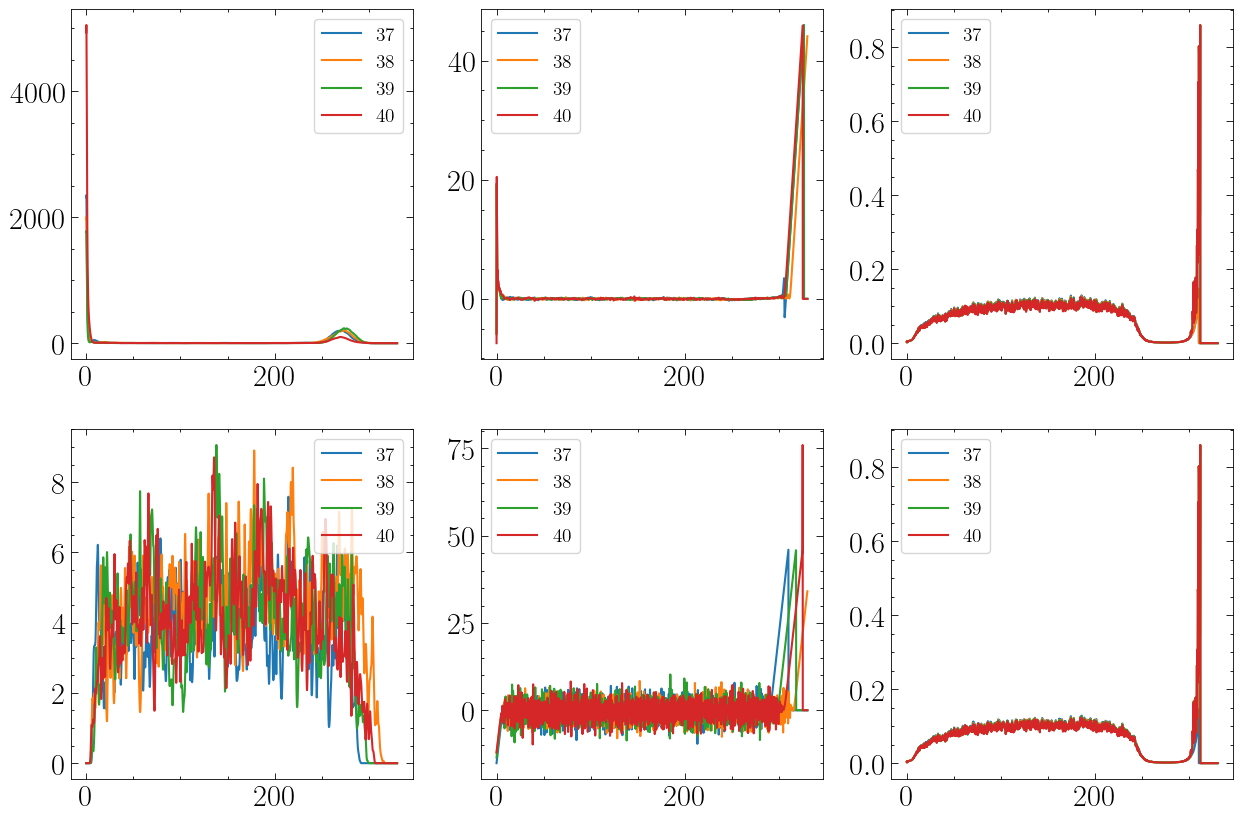

In [23]:
path_master = "/home/ucecabj/Storage/MFI_new/LJ_fluid/LJ_results/results_T6n80/"
x = np.linspace(0, 330, 2641)
i_ = 38
plt.figure(figsize=(15,10))

for i_  in [37,38,39,40]:
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "forward_master_" + str(i_) + "_n80")
    [Ftot_den_b, Ftot_den2_b, Ftot_b, ofv_num_b, ofe_b] = MFI1D.load_npy(path_master + "backward_master_" + str(i_) + "_n80")

    plt.subplot(2,3,1); plt.plot(x,Ftot_den, label=str(i_)); plt.legend(fontsize=14)
    plt.subplot(2,3,2); plt.plot(x,Ftot, label=str(i_)); plt.legend(fontsize=14)
    plt.subplot(2,3,3); plt.plot(x,ofe, label=str(i_)); plt.legend(fontsize=14)

    plt.subplot(2,3,4); plt.plot(x,Ftot_den_b, label=str(i_)); plt.legend(fontsize=14)
    plt.subplot(2,3,5); plt.plot(x,Ftot_b, label=str(i_)); plt.legend(fontsize=14)
    plt.subplot(2,3,6); plt.plot(x,ofe_b, label=str(i_)); plt.legend(fontsize=14)

plt.show()
    
# [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "backward_master_" + str(i) + "_n80")


In [ ]:
forceterms_forw = []; forceterms_back = []

index_list = np.arange(1,51).tolist()
# index_list.remove(3) 
# index_list.remove(5)
# index_list.remove(7)
index_list.remove(38)

#load force terms
for i in index_list:
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "forward_master_" + str(i) + "_n80")
    forceterms_forw.append( [Ftot_den, Ftot_den2, Ftot + bias_force_80, ofv_num] )
    [Ftot_den, Ftot_den2, Ftot, ofv_num, ofe] = MFI1D.load_npy(path_master + "backward_master_" + str(i) + "_n80")
    forceterms_back.append( [Ftot_den, Ftot_den2, Ftot, ofv_num] )

MFI.save_npy([forceterms_forw, forceterms_back], path_figure4 + "LJ_n80_allforces")

Itteration: 50 - sd: 0.50928
Itteration: 100 - sd: 0.44292
Itteration: 150 - sd: 0.45898
Itteration: 200 - sd: 0.47662
Itteration: 250 - sd: 0.48347
Itteration: 300 - sd: 0.49188
Itteration: 350 - sd: 0.49341
Itteration: 400 - sd: 0.49454
Itteration: 450 - sd: 0.49107
Itteration: 500 - sd: 0.48632


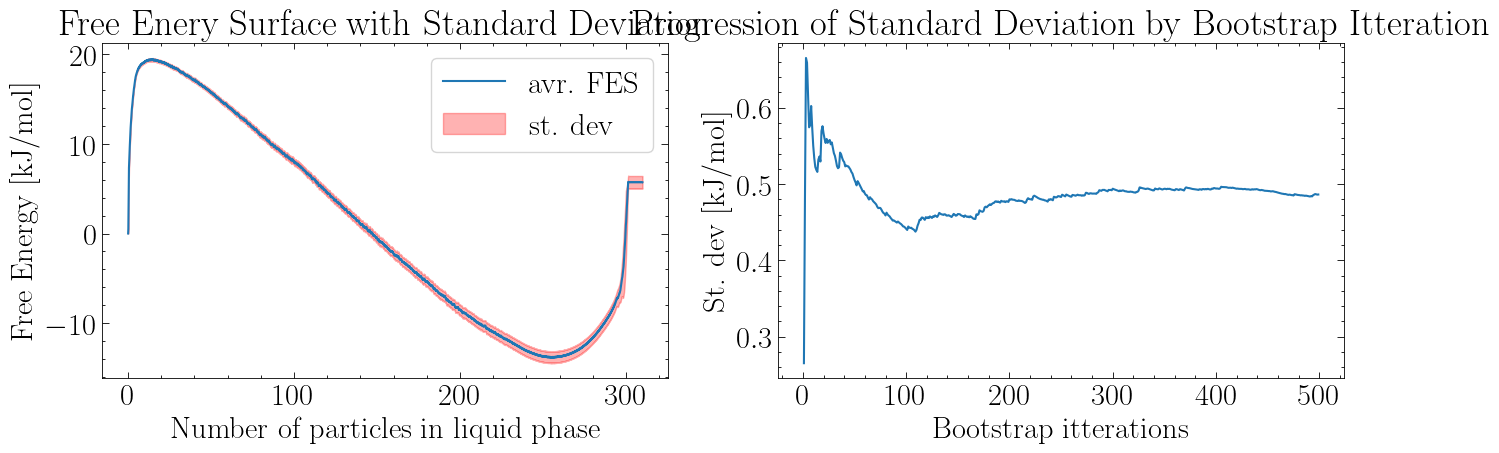

In [14]:
# # os.chdir(path + "/DATA_examples/1D_LJ_T6n55")

# path_forceterms = "/home/ucecabj/Desktop/pyMFI_git/DATA_examples/1D_LJ_T6n55/force_terms/"

# #initialise force list and grid
# forceterms_forw = []
# forceterms_back = []
# min_grid=0; max_grid=275; nbins=2201; X = np.linspace(min_grid, max_grid, nbins)

# #load force terms
# for i in range(1,51):
#     [Ftot_den, Ftot_den2, Ftot, ofv_num] = MFI1D.load_pkl(path_forceterms + "forces_forw_"+str(i))
#     forceterms_forw.append( [Ftot_den, Ftot] )
#     [Ftot_den, Ftot_den2, Ftot, ofv_num] = MFI1D.load_pkl(path_forceterms + "forces_back_"+str(i))
#     forceterms_back.append( [Ftot_den, Ftot] )
    
#Boostrap
[FES_avr, sd_fes, sd_fes_prog ] = MFI1D.bootstrap_forw_back(X, np.asarray(forceterms_forw), np.asarray(forceterms_back), n_bootstrap=500, set_fes_minima="first_value")
    
#Plot
plt.figure(figsize=(14,5)); plt.subplot(1,2,1)
plt.plot(X, FES_avr, label="avr. FES")
plt.fill_between(X, FES_avr - sd_fes, FES_avr + sd_fes, alpha=0.3, color="red", label="st. dev")
plt.xlabel("Number of particles in liquid phase"), plt.ylabel("Free Energy [kJ/mol]"); plt.legend(); plt.title("Free Enery Surface with Standard Deviation")


plt.subplot(1,2,2)
plt.plot(range(len(sd_fes_prog)), sd_fes_prog)
plt.xlabel("Bootstrap itterations"), plt.ylabel("St. dev [kJ/mol]"); plt.title("Progression of Standard Deviation by Bootstrap Itteration"); plt.tight_layout()

NameError: name 'X' is not defined

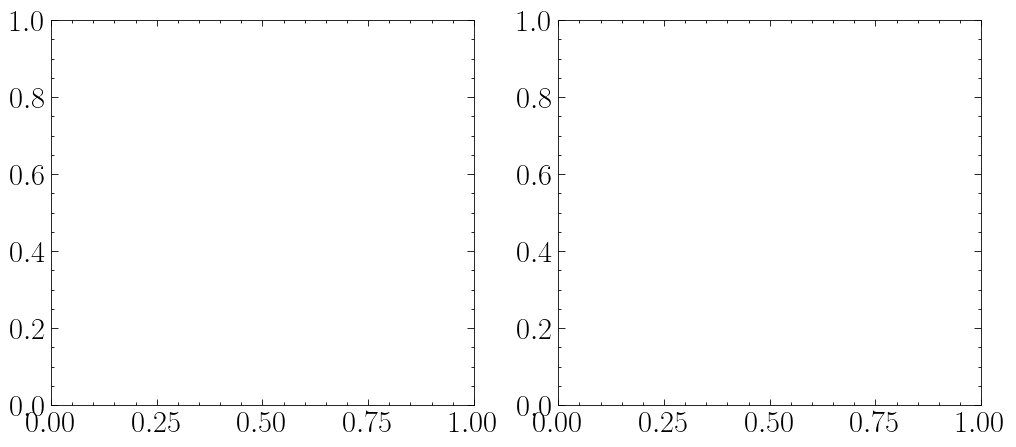

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 20, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(20, 35, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$]",fontsize=16)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure2_A', dpi=600, bbox_inches='tight')

fig, axs = plt.subplots(1, 1, figsize=(12, 4))

OFE_history_long=ofe_history[1:]
time_OFE_history_long=[time for time in time_history[1:]]

axs.plot( [time for time in time_history[1:]], (ofe_history[1:]),color='blue',alpha=0.5,linewidth=3);
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='blue')
axs.tick_params(axis ='y', labelcolor = 'blue')
axs.set_xlabel('Simulation steps')

ax2 = axs.twinx()
ax2.set_xlabel('Simulation steps')
ax2.set_ylabel('Sampled Volume',color='red')
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:],np.power(6,2)),color='red',alpha=0.5,linewidth=3);

plt.savefig('Figure2B', dpi=600, bbox_inches='tight')


grid = np.linspace(-3, 3, 200); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)

plt.figure(figsize=(5,4)); 
plt.contourf(X, Y, inve_pot, levels=range(0, 20, 1), cmap='coolwarm')
plt.xlabel("x"); plt.ylabel("y"); 
plt.title("Analytical Invernizzi Potential"); 
plt.colorbar()
plt.show()


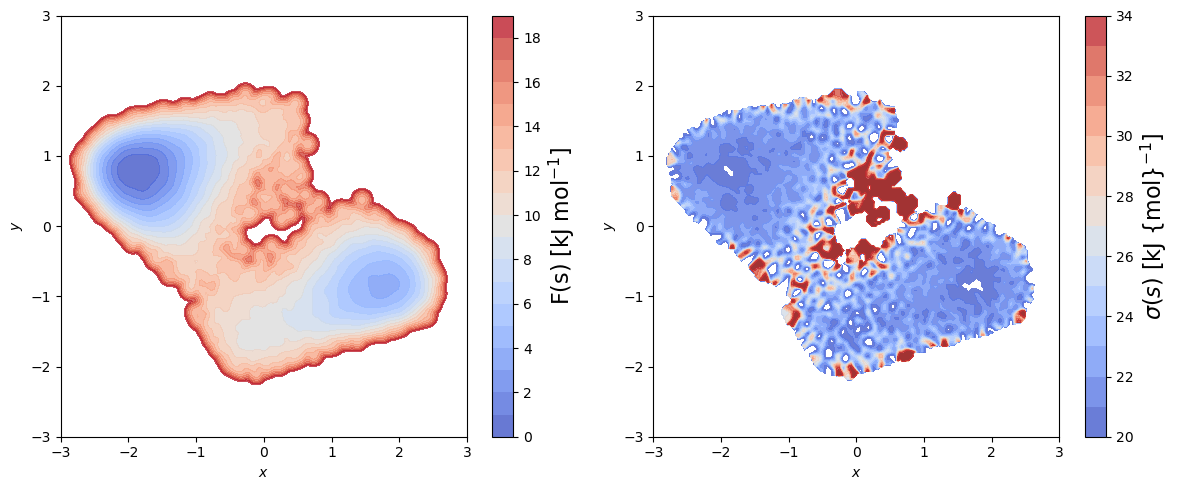

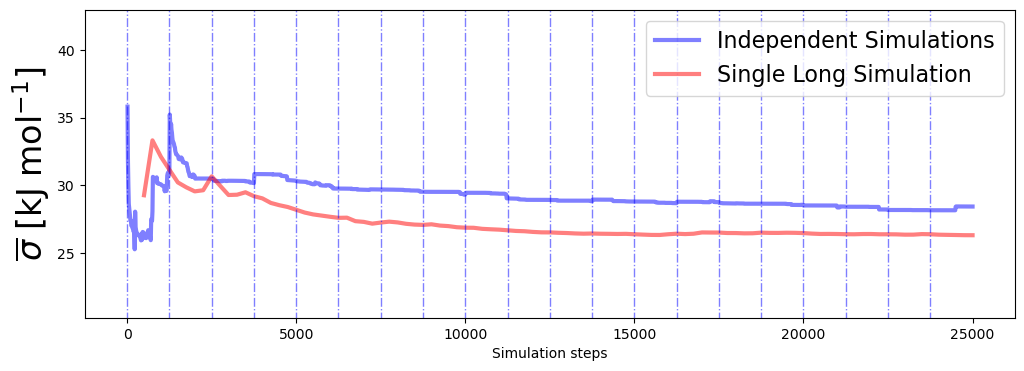

In [169]:
os.chdir(path + "/DATA_examples/Invernizzi_2D_potential_more_data")

#make "sim_start" list with only the first entry of a simulation
sim_start = [ofe_history_patch_time[i] for i in range(n_simulations)]
sim_start_error = [ofe_history_patch[i] for i in range(n_simulations)]

# Plot Results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
cp = axs[0].contourf(Xp, Yp, FES_patch, levels=np.arange(0, 20, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe_patch*cutoff, levels=[35,200], cmap=colors.ListedColormap(['darkred']), antialiased=False, alpha=0.8);
cp = axs[1].contourf(X, Y, ofe_patch*cutoff, levels=np.arange(20, 35, 1), cmap='coolwarm', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$]",fontsize=16)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$y$')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure2_C', dpi=600, bbox_inches='tight')

fig, axs = plt.subplots(1, 1, figsize=(12, 4))
axs.plot( [time for time in ofe_history_patch_time], (ofe_history_patch),color='blue',alpha=0.5,linewidth=3,label="Independent Simulations");
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='black')
axs.tick_params(axis ='y', labelcolor = 'black')

axs.plot( time_OFE_history_long, OFE_history_long ,color='red',alpha=0.5,linewidth=3,label="Single Long Simulation");
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$]',fontsize=24, color='black')

axs.set_xlabel('Simulation steps')

for i in np.arange(0,n_simulations):
    axs.plot([i*1250,i*1250],[20,50],'-.',color='blue',linewidth=1,alpha=0.5)

axs.set_ylim([min(ofe_history_patch)*0.8,max(ofe_history_patch)*1.2])

axs.legend(fontsize=16)

plt.savefig('Figure2_D', dpi=600, bbox_inches='tight')

#ax2 = axs.twinx()
#ax2.set_xlabel('Simulation steps')
#ax2.set_ylabel('Sampled Volume',color='red')
#ax2.tick_params(axis ='y', labelcolor = 'red')
#ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:],np.power(6/200,2)),color='red',alpha=0.5,linewidth=3);


### NEW : instead of patching 20 normal simulations, only take 17 normal simulations and 3 HP simulations, focusing on the unexplored region in the centre